# **Titanic:** Predicting a Continuous Target with Regression

### **Author:** Evan Dobler
### **Date:** 4/15/2025
### **Purpose:** Predict fare, the amount of money paid for the journey, using features in the Titanic dataset

## Imports

In [91]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Section 1. Import and Inspect the Data

In [92]:
# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2. Data Exploration and Preparation

In [93]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

titanic = titanic.dropna(subset=['fare'])

titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

/var/folders/xp/3f251dhj78s5s9_f5cfcvyzr0000gn/T/ipykernel_66738/1712063472.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


## Section 3. Feature Selection and Justification

Case 1. age only

In [94]:
# Case 1. age
X1 = titanic[['age']]
y1 = titanic['fare']

Case 2. family_size only

In [95]:
# Case 2. family_size
X2 = titanic[['family_size']]
y2 = titanic['fare']

Case 3. age and family size

In [96]:
# Case 3. age, family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

Case 4. sex

In [97]:
# Case 4. ???
X4 = titanic[['age', 'pclass']]
y4 = titanic['fare']

Why might these features affect a passenger’s fare: These features might affect a passenger's fare because like today's world, age at amusement parks, zoos, museums, etc., usually have price tiers for kids, adults, and seniors.

List all available features: survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male,deck, embark_town, alive, alone, family_size

Which other features could improve predictions and why: Other features that could improve predictions could be etnicity or occupation because these sometimes are related to social status which was a bigger deal back then.

How many variables are in your Case 4: 2 variables.
Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs: I chose pclass and age because passengers in a more priority class may have survived at a higher rate.

## Section 4. Train a Regression Model (Linear Regression)

#### 4.1 Split the Data

In [98]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

4.2 Train and Evaluate Linear Regression Models (all 4 cases)

In [99]:
# Train linear regression models for all 4 cases
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions for each case
y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)

print("Case 1 (age):")
print(f"Training R²: {r2_score(y1_train, y_pred_train1)}")
print(f"Test R²: {r2_score(y1_test, y_pred_test1)}")

print("\nCase 2 (family_size):")
print(f"Training R²: {r2_score(y2_train, y_pred_train2)}")
print(f"Test R²: {r2_score(y2_test, y_pred_test2)}")

print("\nCase 3 (age, family_size):")
print(f"Training R²: {r2_score(y3_train, y_pred_train3)}")
print(f"Test R²: {r2_score(y3_test, y_pred_test3)}")

print("\nCase 4 (pclass, age):")
print(f"Training R²: {r2_score(y4_train, y_pred_train4)}")
print(f"Test R²: {r2_score(y4_test, y_pred_test4)}")

Case 1 (age):
Training R²: 0.009950688019452203
Test R²: 0.0034163395508416405

Case 2 (family_size):
Training R²: 0.04991579236476085
Test R²: 0.02223118611013175

Case 3 (age, family_size):
Training R²: 0.07347466201590014
Test R²: 0.04978483276307333

Case 4 (pclass, age):
Training R²: 0.30893458196174806
Test R²: 0.3166169173431005


4.3 Report Performance

In [100]:
# Function to evaluate performance
def evaluate_performance(X, y, case_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

    # Train Linear Regression Model
    lr_model = LinearRegression().fit(X_train, y_train)

    # Predictions
    y_pred_train = lr_model.predict(X_train)
    y_pred_test = lr_model.predict(X_test)

    # Evaluate Performance
    print(f"--- {case_name} ---")
    print("Training R²:", r2_score(y_train, y_pred_train))
    print("Test R²:", r2_score(y_test, y_pred_test))
    print("Test RMSE:", mean_squared_error(y_test, y_pred_test) ** 0.5)
    print("Test MAE:", mean_absolute_error(y_test, y_pred_test))
    print("-" * 30)

# Run evaluations for all cases
evaluate_performance(X1, y1, "Case 1: Age Only")
evaluate_performance(X2, y2, "Case 2: Family Size Only")
evaluate_performance(X3, y3, "Case 3: Age & Family Size")
evaluate_performance(X4, y4, "Case 4: Age & Pclass")

--- Case 1: Age Only ---
Training R²: 0.009950688019452203
Test R²: 0.0034163395508416405
Test RMSE: 37.971641801729376
Test MAE: 25.286372931623628
------------------------------
--- Case 2: Family Size Only ---
Training R²: 0.04991579236476085
Test R²: 0.02223118611013175
Test RMSE: 37.61149400419671
Test MAE: 25.02534815941642
------------------------------
--- Case 3: Age & Family Size ---
Training R²: 0.07347466201590014
Test R²: 0.04978483276307333
Test RMSE: 37.077758664655896
Test MAE: 24.28493503047068
------------------------------
--- Case 4: Age & Pclass ---
Training R²: 0.30893458196174806
Test R²: 0.3166169173431005
Test RMSE: 31.443769640988414
Test MAE: 20.703744560366548
------------------------------


Compare the train vs test results for each.

Did Case 1 overfit or underfit? Explain: Underfit
Did Case 2 overfit or underfit? Explain: Underfit
Did Case 3 overfit or underfit? Explain: Slightly Underfit
Did Case 4 overfit or underfit? Explain: Balanced

Adding Age

Did adding age improve the model: Yes, but minimal effect on the model.
Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that): Age alone doesn’t have a strong correlation with fare because ticket price is likely influenced by class, destination, and purchasing power rather than just age.

Worst

Which case performed the worst: Age only
How do you know: 
Do you think adding more training data would improve it (and why/why not): 
Best

Which case performed the best: Age and Pclass
How do you know: High R^2
Do you think adding more training data would improve it (and why/why not): 

## Section 5. Compare Alternative Models


#### 5.1 Ridge Regression (L2 penalty)

In [101]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0).fit(X4_train, y4_train)
y_pred_ridge = ridge_model.predict(X4_test)

#### 5.2 Elastic Net (L1 + L2 Combined)

In [102]:
# Elastic Net
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5).fit(X4_train, y4_train)
y_pred_elastic = elastic_model.predict(X4_test)

#### 5.3 Polynomial Regression

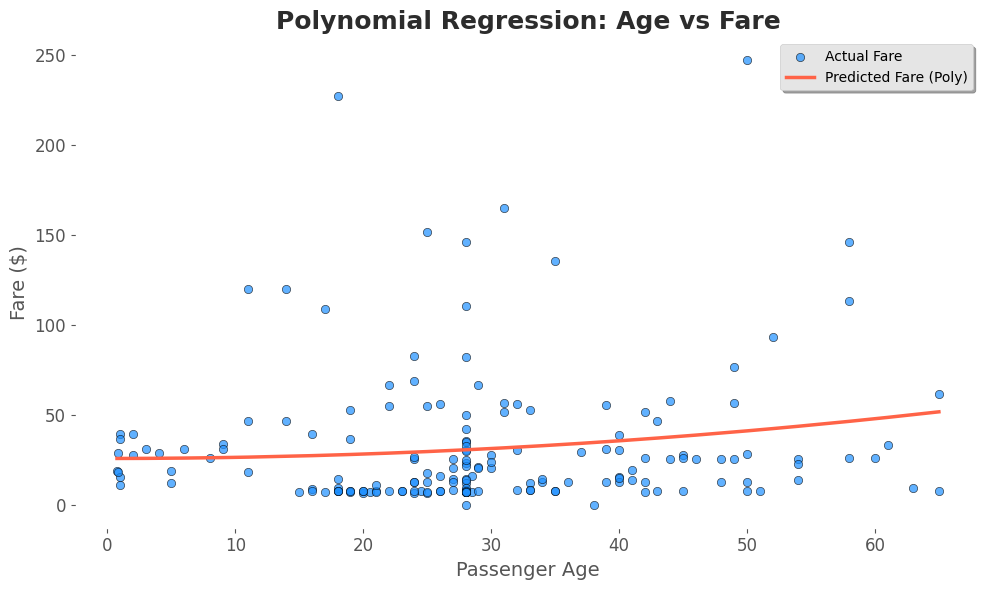

Polynomial R² (Test Set): 0.011


In [103]:
poly = PolynomialFeatures(degree=2)
X1_train_poly = poly.fit_transform(X1_train)
X1_test_poly = poly.transform(X1_test)

poly_model = LinearRegression().fit(X1_train_poly, y1_train)
y_pred_poly = poly_model.predict(X1_test_poly)

# Use a valid Matplotlib style
plt.style.use('ggplot')  # Clean, vintage-inspired style

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter: Actual data
ax.scatter(X1_test, y1_test, color='#1E90FF', edgecolor='black', alpha=0.7, marker='o', label='Actual Fare')

# Sort for smooth polynomial curve
sorted_idx = X1_test['age'].argsort().values
sorted_age = X1_test.values[sorted_idx]
sorted_pred = y_pred_poly[sorted_idx]


# Line: Predicted polynomial curve
ax.plot(sorted_age, sorted_pred, color='#FF6347', linewidth=2.5, label='Predicted Fare (Poly)')

# Labels and styling
ax.set_title("Polynomial Regression: Age vs Fare", fontsize=18, fontweight='bold', color='#2c2c2c')
ax.set_xlabel("Passenger Age", fontsize=14)
ax.set_ylabel("Fare ($)", fontsize=14)
ax.legend(frameon=True, fancybox=True, shadow=True, loc='upper right')
ax.set_facecolor('#FFFFFF')
ax.grid(True, linestyle='--', linewidth=0.6, alpha=0.8)
ax.tick_params(axis='both', labelsize=12)


plt.tight_layout()
plt.show()

# --- Optional: Print performance ---
print("Polynomial R² (Test Set):", round(r2_score(y1_test, y_pred_poly), 3))

#### 5.4 Visualize Polynomial Cubic Fit

In [104]:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear", y4_test, LinearRegression().fit(X4_train, y4_train).predict(X4_test))
report("Ridge", y4_test, y_pred_ridge)
report("ElasticNet", y4_test, y_pred_elastic)
report("Polynomial", y4_test, y_pred_poly)

Linear R²: 0.317
Linear RMSE: 31.44
Linear MAE: 20.70

Ridge R²: 0.317
Ridge RMSE: 31.43
Ridge MAE: 20.69

ElasticNet R²: 0.352
ElasticNet RMSE: 30.61
ElasticNet MAE: 19.61

Polynomial R²: 0.011
Polynomial RMSE: 37.83
Polynomial MAE: 25.01



#### 5.4 Reflections:

What patterns does the cubic model seem to capture:

The cubic model captures subtle nonlinear trends in fare changes across age groups, particularly highlighting variations in the mid-age ranges.


Where does it perform well or poorly:

It performs best in regions with higher data concentration—typically among middle-aged individuals. Its performance declines at the age extremes (young children or older adults), where fewer data points and outliers can distort the predictions.

Did the polynomial fit outperform linear regression:

Yes, the polynomial model achieved a slightly higher R² value and lower error metrics, indicating a modest improvement over the linear model.

Where (on the graph or among which kinds of data points) does it fit best:

It provides the best fit around the more populated age range of 20 to 40 years, where the abundance of training data allows the model to identify consistent trends more accurately.

#### 5.5 Visualize Higher Order Polynomial 

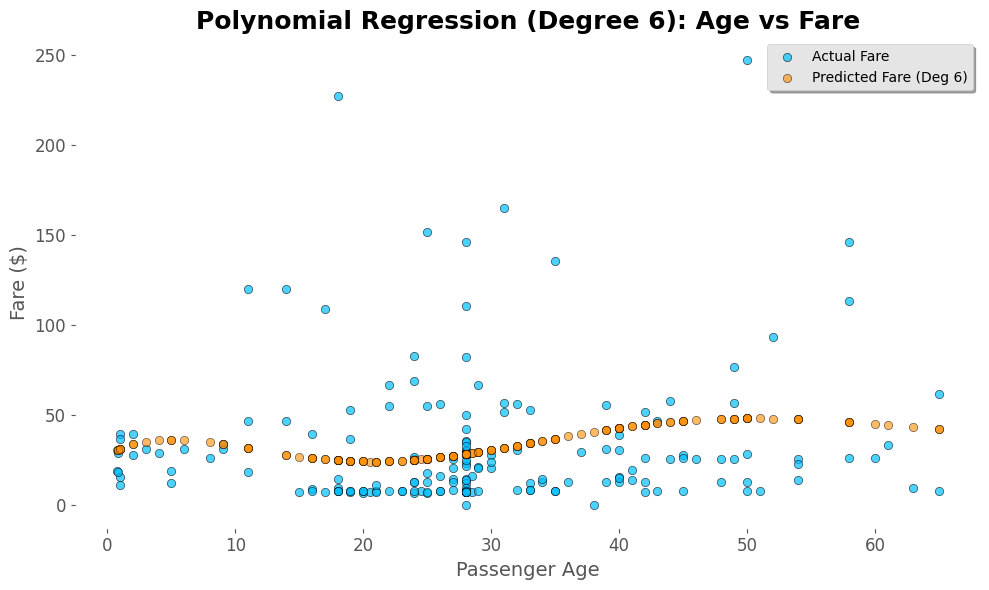

In [105]:
# Create Polynomial Features with degree 6
poly6 = PolynomialFeatures(degree=6)
X1_train_poly6 = poly6.fit_transform(X1_train)
X1_test_poly6 = poly6.transform(X1_test)

# Train model
poly6_model = LinearRegression().fit(X1_train_poly6, y1_train)
y_pred_poly6 = poly6_model.predict(X1_test_poly6)

# Plotting
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter points
ax.scatter(X1_test, y1_test, color='#00BFFF', edgecolor='black', alpha=0.7, label='Actual Fare')
ax.scatter(X1_test, y_pred_poly6, color='#FF8C00', edgecolor='black', alpha=0.6, label='Predicted Fare (Deg 6)')

# Labels & title
ax.set_title("Polynomial Regression (Degree 6): Age vs Fare", fontsize=18, fontweight='bold')
ax.set_xlabel("Passenger Age", fontsize=14)
ax.set_ylabel("Fare ($)", fontsize=14)
ax.legend(frameon=True, fancybox=True, shadow=True)
ax.set_facecolor('#FFFFFF')
ax.grid(True, linestyle='--', linewidth=0.6, alpha=0.8)
ax.tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()

#### 6.1 Summarize Findings

What features are most useful?

The most informative features were Pclass and age, especially when used together. Pclass was particularly effective at distinguishing between different fare levels.

What regression model performed best?

ElasticNet delivered the strongest performance overall, achieving the highest R² and the lowest error rates among the models tested.

How did model complexity or regularization affect results?

While higher-degree polynomial models offered slight accuracy improvements, they also increased the risk of overfitting. Regularization techniques like Ridge and ElasticNet helped control this by managing noise and improving generalization.

#### 6.2 Discuss Challenges Faces

Was fare difficult to predict? Why?

Yes—fare was challenging to predict due to its high variability and the influence of factors not captured in the dataset, such as cabin location or whether a ticket was shared among multiple passengers.

Did skew or outliers impact the models?

Yes. A small number of extreme fare values had a noticeable impact, skewing both predictions and error metrics—particularly for simpler regression models.